In [1]:
import pandas as pd
from scipy import stats

# 区間の集計
## サンプルデータの作成

,Norm,LogNorm
count,10000.000000,10000.000000
mean,-0.014373,1.619081
std,1.013998,2.089544
min,-4.037293,0.018319
25%,-0.703383,0.519668
50%,-0.016300,0.997597
75%,0.681661,1.942053
max,3.877211,42.908363


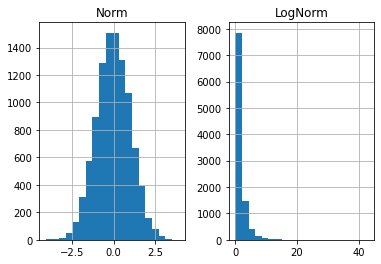

In [2]:
df = pd.DataFrame()
df['Norm'] = stats.norm.rvs(loc=0, scale=1, size=10000)
df['LogNorm'] = stats.lognorm.rvs(loc=0, s=1, size=10000)
df.hist(bins=20)
df.describe()

## 区間ごとのデータ個数の作成

In [3]:
B = df['Norm'].value_counts(bins=20)
B

(-0.08, 0.316]      1508
(-0.476, -0.08]     1504
(0.316, 0.711]      1310
(-0.871, -0.476]    1291
(0.711, 1.107]      1067
(-1.267, -0.871]     892
(1.107, 1.503]       672
(-1.663, -1.267]     571
(1.503, 1.899]       394
(-2.059, -1.663]     309
(1.899, 2.294]       161
(-2.454, -2.059]     128
(2.294, 2.69]         77
(-2.85, -2.454]       53
(2.69, 3.086]         29
(-3.246, -2.85]       15
(-3.642, -3.246]       7
(3.086, 3.481]         6
(-4.046, -3.642]       4
(3.481, 3.877]         2
Name: Norm, dtype: int64

In [4]:
### Seriesオブジェクトをインデックスの順に整列
B.sort_index(inplace=True)
B


(-4.046, -3.642]       4
(-3.642, -3.246]       7
(-3.246, -2.85]       15
(-2.85, -2.454]       53
(-2.454, -2.059]     128
(-2.059, -1.663]     309
(-1.663, -1.267]     571
(-1.267, -0.871]     892
(-0.871, -0.476]    1291
(-0.476, -0.08]     1504
(-0.08, 0.316]      1508
(0.316, 0.711]      1310
(0.711, 1.107]      1067
(1.107, 1.503]       672
(1.503, 1.899]       394
(1.899, 2.294]       161
(2.294, 2.69]         77
(2.69, 3.086]         29
(3.086, 3.481]         6
(3.481, 3.877]         2
Name: Norm, dtype: int64

In [5]:
B.index[0]

Interval(-4.046, -3.642, closed='right')

In [6]:
B.max()#最頻値

1508

## Intervalオブジェクト

In [7]:
iv = pd.Interval(1,2,closed='neither')
iv

Interval(1, 2, closed='neither')

In [8]:
print(iv)
###　注意）下の表示されているオブジェクトはタプルではないです

(1, 2)


In [9]:
1.5 in iv
#True

True

In [10]:
3 in iv
# False

False

In [11]:
1 in iv
# False

False

# データの可視化
## matplotlibによる作図処理

In [13]:
import matplotlib.pyplot as plt
import numpy as np

In [15]:
x = np.arange(-2, 2, 0.05)

In [17]:
y = x**2

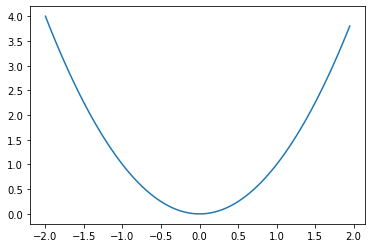

In [18]:
plt.plot(x, y)

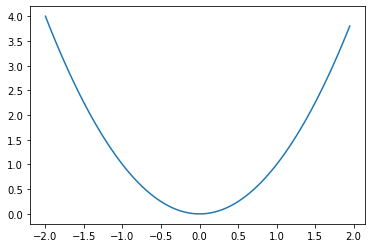

In [19]:
# より正しいmatplotlibの手順
plt.figure()
plt.plot(x, y)
plt.show()

### グラフを画像データとして保存

In [21]:
fname = r'D:\APIpractice\APIpractice\prc_git\python' + r'\testfig.png'
fname

'D:\\APIpractice\\APIpractice\\prc_git\\python\\testfig.png'

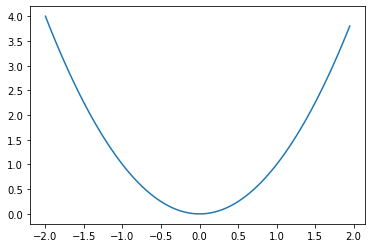

In [22]:
plt.figure()# 描画の準備処理
plt.plot(x, y)# 描画処理
plt.savefig(fname)# 図の保存
plt.show()

## pandasへの応用

In [23]:
fname2 = r'D:\APIpractice\APIpractice\prc_git\python' + r'\testfig02.png'


<Figure size 432x288 with 0 Axes>

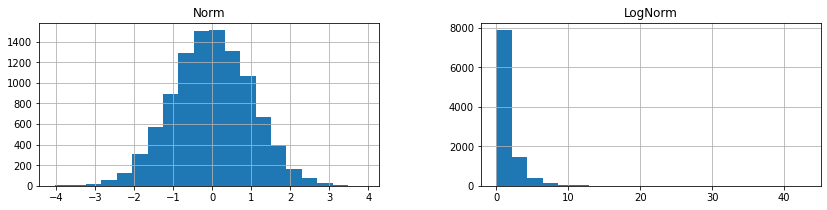

In [24]:
plt.figure()# 描画の準備処理
df.hist(bins=20, figsize=(14,3))# 描画処理
plt.savefig(fname2)# 図の保存
plt.show()

### グラフを重ねてプロットする方法

In [26]:
fname3 = r'D:\APIpractice\APIpractice\prc_git\python' + r'\testfig03.png'
fname3

'D:\\APIpractice\\APIpractice\\prc_git\\python\\testfig03.png'

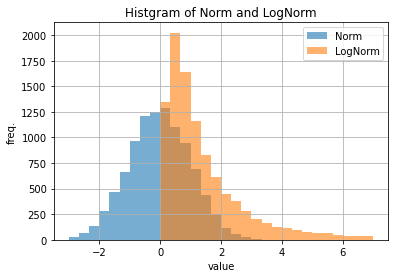

In [34]:
plt.figure()# 描画の準備処理
df['Norm'].hist(bins=30, alpha=0.6, range=(-3,7), label='Norm')
df['LogNorm'].hist(bins=30, alpha=0.6, range=(-3,7), label='LogNorm')
plt.xlabel('value')
plt.ylabel('freq.')
plt.legend()
plt.title('Histgram of Norm and LogNorm')
plt.savefig(fname3)# 図の保存
plt.show()

### 日本語フォントを使用するための準備

In [36]:
import japanize_matplotlib

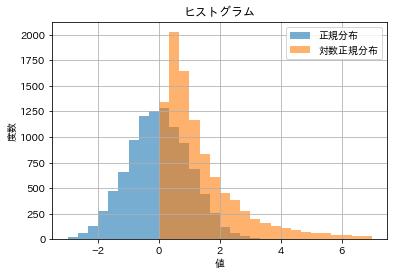

In [37]:
# 日本語表示が上手く出来ない例として
plt.figure()# 描画の準備処理
df['Norm'].hist(bins=30, alpha=0.6, range=(-3,7), label='正規分布')
df['LogNorm'].hist(bins=30, alpha=0.6, range=(-3,7), label='対数正規分布')
plt.xlabel('値')
plt.ylabel('度数')
plt.legend()
plt.title('ヒストグラム')
plt.savefig(fname3)# 図の保存
plt.show()

## 箱ひげ図

<AxesSubplot:>

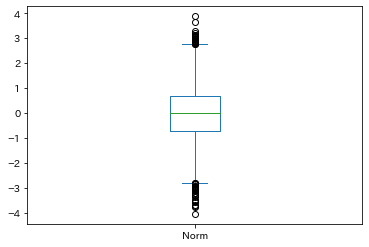

In [38]:
df['Norm'].plot(kind='box')

<AxesSubplot:>

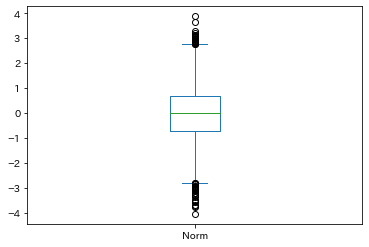

In [39]:
df['Norm'].plot.box()

<AxesSubplot:>

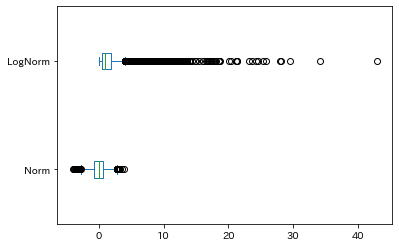

In [42]:
df.plot.box(vert=False)

<AxesSubplot:>

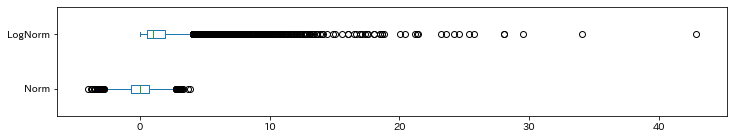

In [43]:
df.plot.box(vert=False, figsize=(12,2))